In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Importing the dataset
file_name = 'step_torque_full.csv'
df = pd.read_csv(file_name, index_col=0)
df.head()

,VSI_Motor_Speed_RR,VSI_Motor_Speed_RL,VSI_Motor_Speed_FR,VSI_Motor_Speed_FL,VSI_TrqFeedback_RR,VSI_TrqFeedback_RL,VSI_TrqFeedback_FR,VSI_TrqFeedback_FL,MISC_Pos_Trq_Limit_RR,MISC_Pos_Trq_Limit_RL,MISC_Pos_Trq_Limit_FR,MISC_Pos_Trq_Limit_FL,MISC_Neg_Trq_Limit_RR,MISC_Neg_Trq_Limit_RL,MISC_Neg_Trq_Limit_FR,MISC_Neg_Trq_Limit_FL
0.00,0.0,0.0,0.0,0.0,0.00000,0.0,-0.25872,-0.12936,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325
0.01,0.0,0.0,0.0,0.0,-0.12936,0.0,-0.12936,-0.12936,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325
0.02,0.0,0.0,0.0,0.0,0.00000,0.0,-0.12936,0.00000,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325
0.03,0.0,0.0,0.0,0.0,-0.25872,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325
0.04,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325


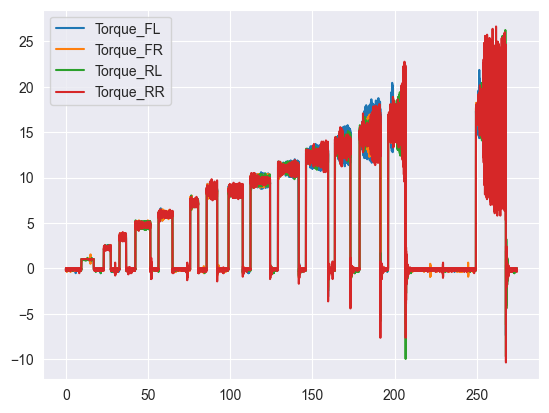

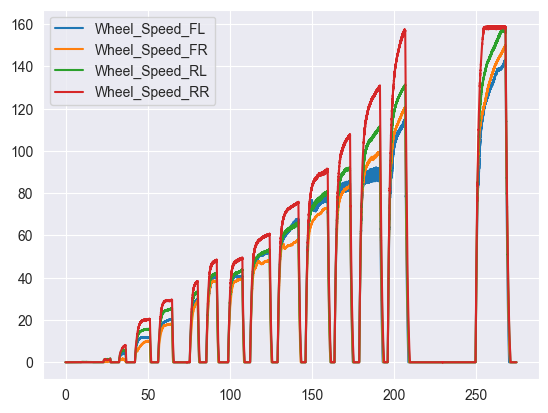

In [67]:
wheels = ['FL', 'FR', 'RL', 'RR']
rpm_cols = [f'VSI_Motor_Speed_{w}' for w in wheels]
torque_cols = [f'VSI_TrqFeedback_{w}' for w in wheels]

new_torque_cols = [f'Torque_{w}' for w in wheels]
new_wheel_speed_cols = [f'Wheel_Speed_{w}' for w in wheels]

gear_ratio = 13.2
rmp_to_rad_per_sec = 2 * np.pi / (gear_ratio * 60)

df[new_torque_cols] = df[torque_cols].copy()
df[new_wheel_speed_cols] = df[rpm_cols].copy() * rmp_to_rad_per_sec

df[new_torque_cols].plot()
df[new_wheel_speed_cols].plot()
plt.show()

In [68]:
# Remove the torque deadzone
torque_deadzone_front = 3.5
torque_deadzone_rear = 2.5
for col in new_torque_cols:
    if 'FL' in col or 'FR' in col:
        torque_deadzone = torque_deadzone_front
    else:
        torque_deadzone = torque_deadzone_rear
    df[col] = df[col].apply(lambda x: 0 if abs(x) < torque_deadzone else x - np.sign(x) * torque_deadzone)

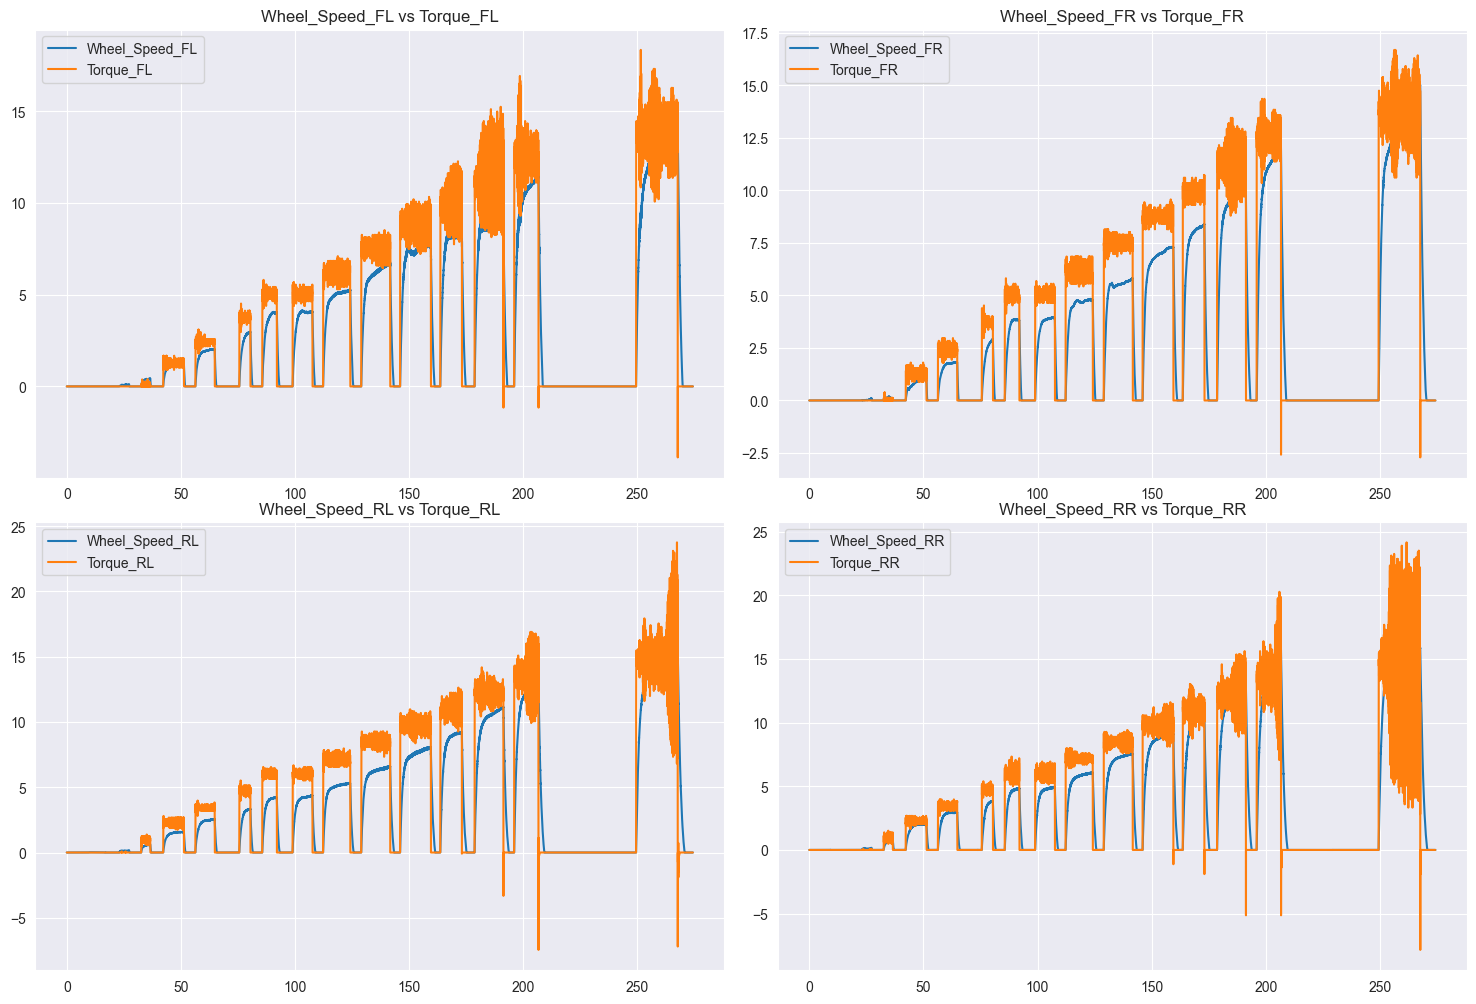

In [69]:
# PLot the data

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.tight_layout()
for i, (scol, tcol) in enumerate(zip(new_wheel_speed_cols, new_torque_cols)):
    ax = axes[i // 2, i % 2]
    ax.plot(df.index, df[scol] / 10, label=scol)
    ax.plot(df.index, df[tcol] , label=tcol)
    ax.set_title(f'{scol} vs {tcol}')
    ax.legend()
plt.show()

    

In [70]:
# Save the data
df[new_torque_cols + new_wheel_speed_cols].to_csv('step_torque_full_processed.csv', index=False)